<a href="https://colab.research.google.com/github/Khachapurilover/AI_PSU/blob/main/2/%D0%A3%D0%B4%D0%BE%D0%B2%D0%BB%D0%B5%D1%82%D0%B2%D0%BE%D1%80%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dtf_test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
dtf_train = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
missing_data = dtf_train.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Unnamed: 0
Unnamed: 0
False    103904
Name: count, dtype: int64
 
id
id
False    103904
Name: count, dtype: int64
 
Gender
Gender
False    103904
Name: count, dtype: int64
 
Customer Type
Customer Type
False    103904
Name: count, dtype: int64
 
Age
Age
False    103904
Name: count, dtype: int64
 
Type of Travel
Type of Travel
False    103904
Name: count, dtype: int64
 
Class
Class
False    103904
Name: count, dtype: int64
 
Flight Distance
Flight Distance
False    103904
Name: count, dtype: int64
 
Inflight wifi service
Inflight wifi service
False    103904
Name: count, dtype: int64
 
Departure/Arrival time convenient
Departure/Arrival time convenient
False    103904
Name: count, dtype: int64
 
Ease of Online booking
Ease of Online booking
False    103904
Name: count, dtype: int64
 
Gate location
Gate location
False    103904
Name: count, dtype: int64
 
Food and drink
Food and drink
False    103904
Name: count, dtype: int64
 
Online boarding
Online boarding
False    103904
Name: count,

In [ ]:
dtf_test.isnull().sum()
dtf_train.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


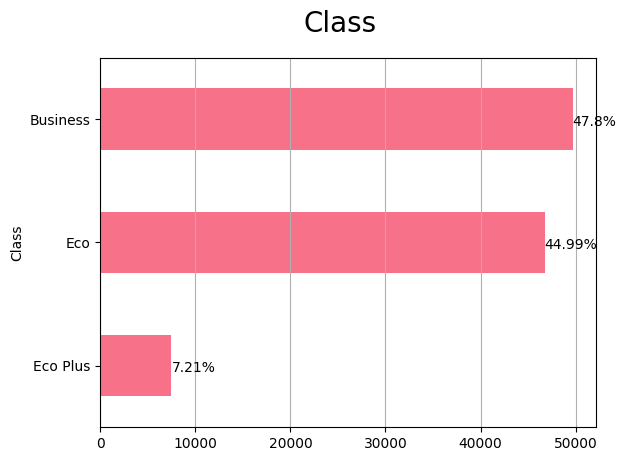

In [ ]:
y ="Class"
ax = dtf_train[y].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

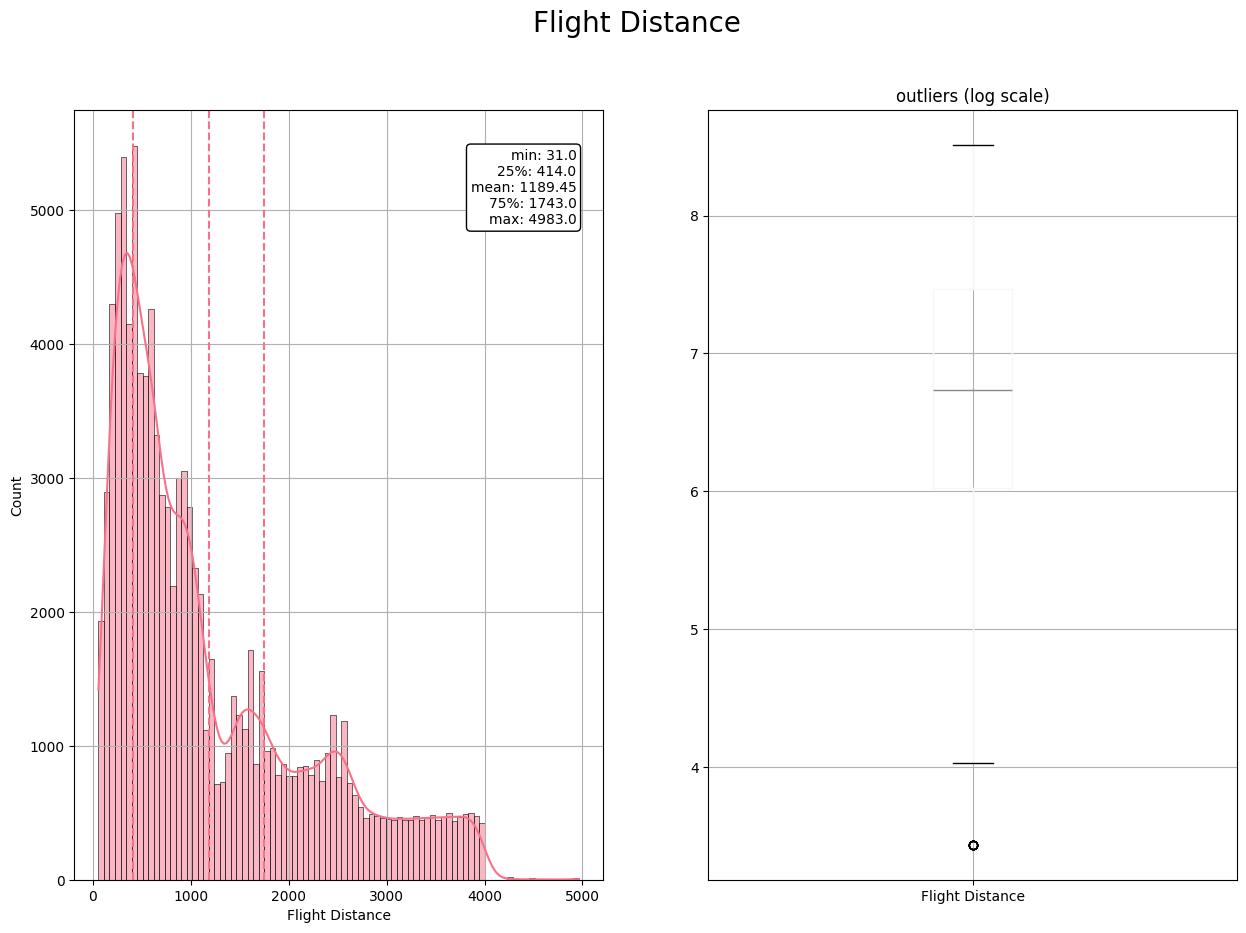

In [ ]:
x = 'Flight Distance'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)
variable = dtf_train[x].fillna(dtf_train[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable <
                                               breaks[10]) ]
sns.histplot(variable, kde=True, ax=ax[0])
#sns.kdeplot(variable, color='black', fill=True, ax=ax[0])
des = dtf_train[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

ax[1].title.set_text('outliers (log scale)')#устанавливаем заголовок
tmp_dtf_train = pd.DataFrame(dtf_train[x])
tmp_dtf_train[x] = np.log(tmp_dtf_train[x])
tmp_dtf_train.boxplot(column=x, ax=ax[1])
plt.show()

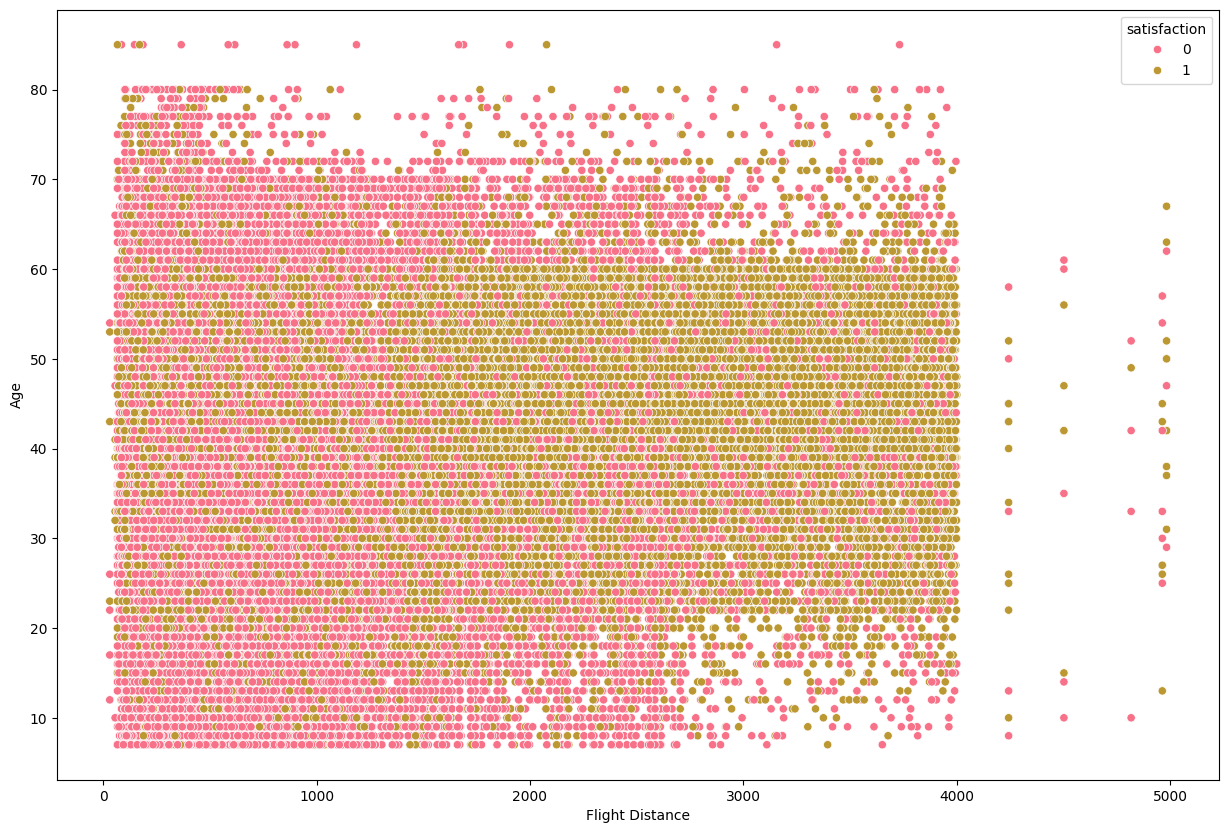

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.scatterplot(dtf_train, x='Flight Distance', y='Age', hue='satisfaction')
plt.show()

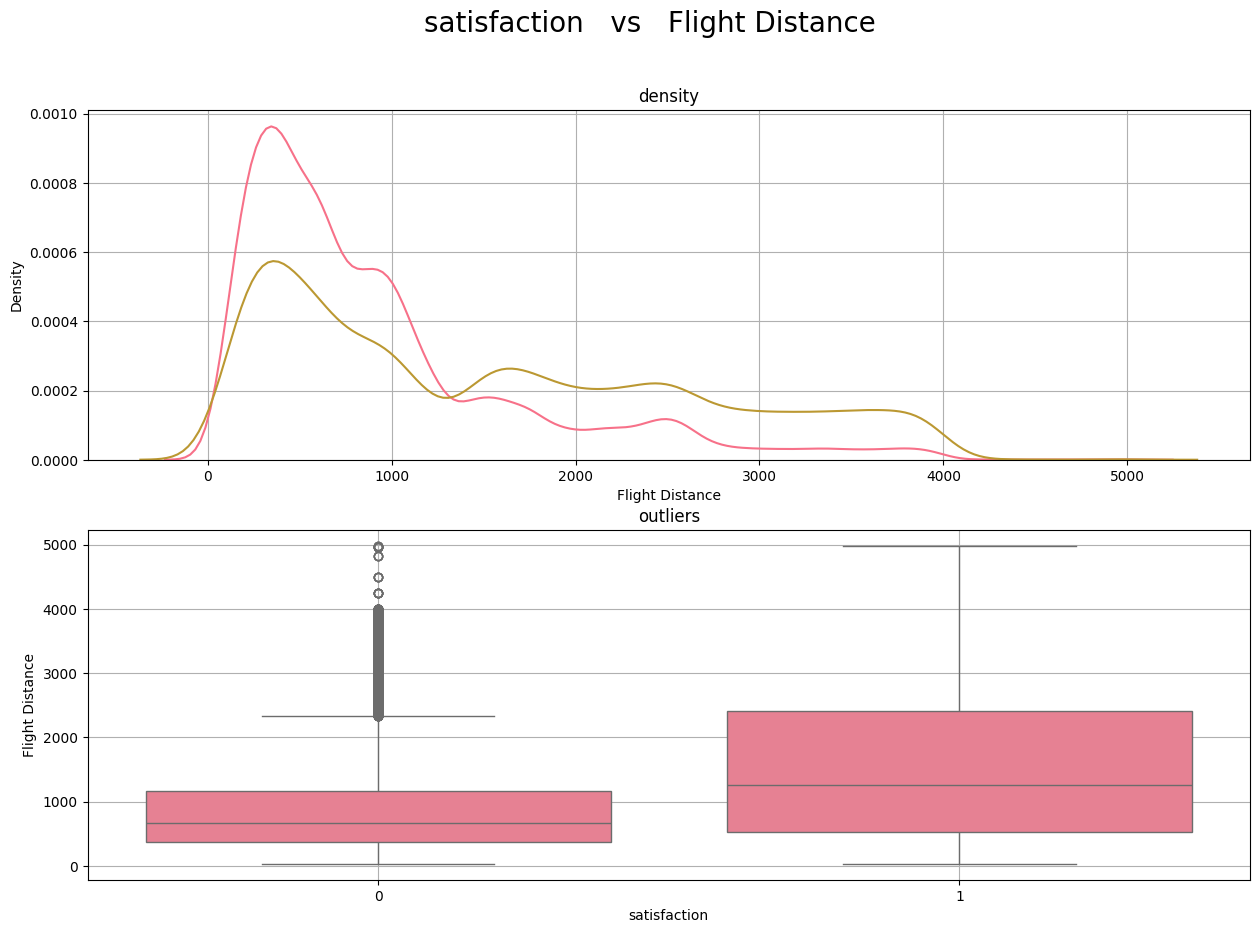

In [ ]:
cat, num = 'satisfaction', 'Flight Distance'
fig, ax = plt.subplots(nrows=2, ncols=1,  sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(cat+"   vs   "+num, fontsize=20)

ax[0].title.set_text('density')
for i in dtf_train[cat].unique():
    sns.kdeplot(dtf_train[dtf_train[cat]==i][num], label='long', ax=ax[0])
ax[0].grid(True)

ax[1].title.set_text('outliers')
sns.boxplot(x=cat, y=num, data=dtf_train, ax=ax[1])
ax[1].grid(True)

plt.show()

In [ ]:
def prep(df):
    df.loc[df['Gender'] == 'Male', 'Gender'] = 0
    df.loc[df['Gender'] == 'Female', 'Gender'] = 1
    df.loc[df['Customer Type'] == 'Loyal Customer', 'Customer Type'] = 0
    df.loc[df['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 1
    df.loc[df['Type of Travel'] == 'Business travel', 'Type of Travel'] = 0
    df.loc[df['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = 1
    df.loc[df['Class'] == 'Eco Plus', 'Class'] = 0
    df.loc[df['Class'] == 'Eco', 'Class'] = 1
    df.loc[df['Class'] == 'Business', 'Class'] = 2
    df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction'] = 0
    df.loc[df['satisfaction'] == 'satisfied', 'satisfaction'] = 1
    df_drop_encoded = df.drop(['Unnamed: 0', 'id'], axis=1)
    df_encoded = df_drop_encoded.dropna(axis=0, how='any', inplace=False)
    return  df_encoded

dtf_train_encoded=prep(dtf_train)
dtf_test_encoded=prep(dtf_test)

In [ ]:
train_x = dtf_train_encoded[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                             'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
train_y = dtf_train_encoded['satisfaction']
test_x = dtf_test_encoded[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                             'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
test_y = dtf_test_encoded['satisfaction']

In [ ]:
Y = 'satisfaction'
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(X, columns=train_x.columns, index=train_x.index )
train_y_scaled = train_y

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [ ]:
Y = 'satisfaction'
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = X = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(X, columns=test_x.columns, index=test_x.index )
test_y_scaled = test_y

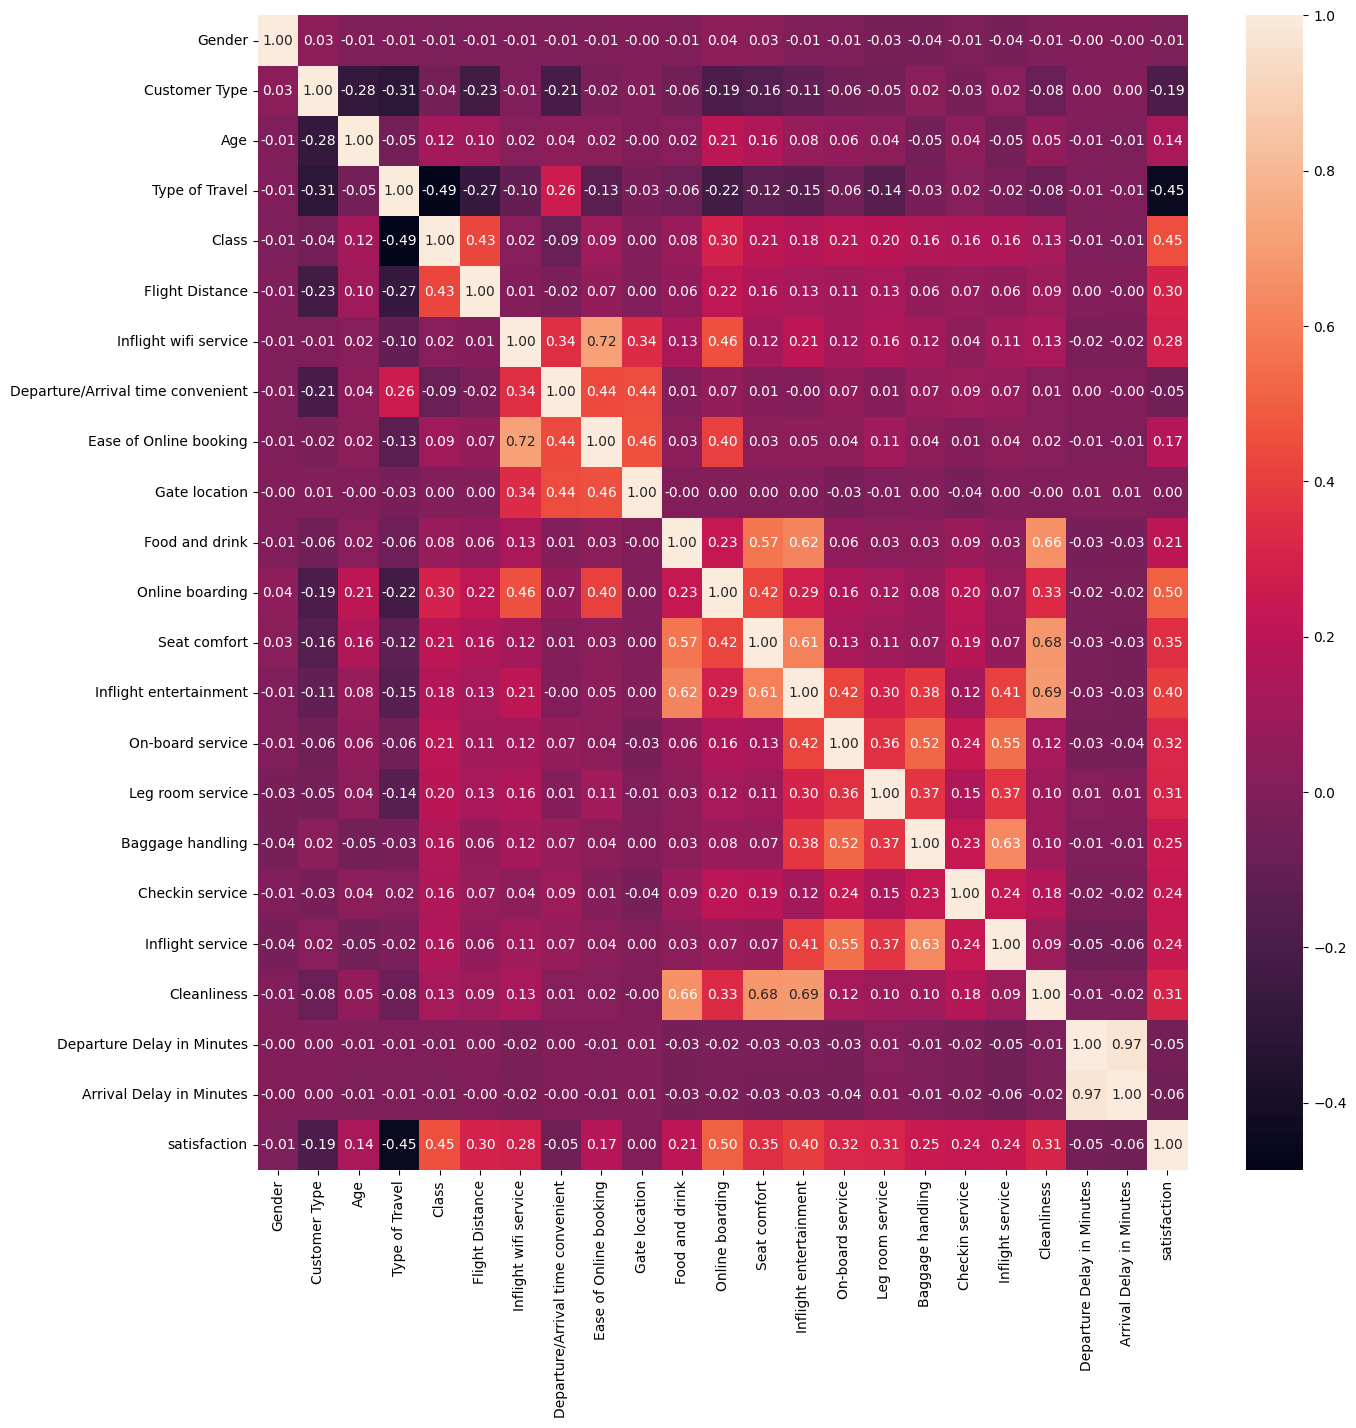

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(dtf_train_encoded.corr(), fmt='.2f', annot=True)
plt.show()

In [ ]:
train_x = dtf_train_encoded[['Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment']]
train_y = dtf_train_encoded['satisfaction']
test_x = dtf_test_encoded[['Type of Travel', 'Class', 'Online boarding', 'Inflight entertainment']]
test_y = dtf_test_encoded['satisfaction']

In [ ]:
Y = 'satisfaction'
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(X, columns=train_x.columns, index=train_x.index )
train_y_scaled = train_y


In [ ]:
Y = 'satisfaction'
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = X = scaler.fit_transform(test_x)
test_x_scaled = pd.DataFrame(X, columns=test_x.columns, index=test_x.index )
test_y_scaled = test_y

In [ ]:
train_y_scaled_numeric = pd.to_numeric(train_y_scaled)
test_y_scaled_numeric = pd.to_numeric(test_y_scaled)

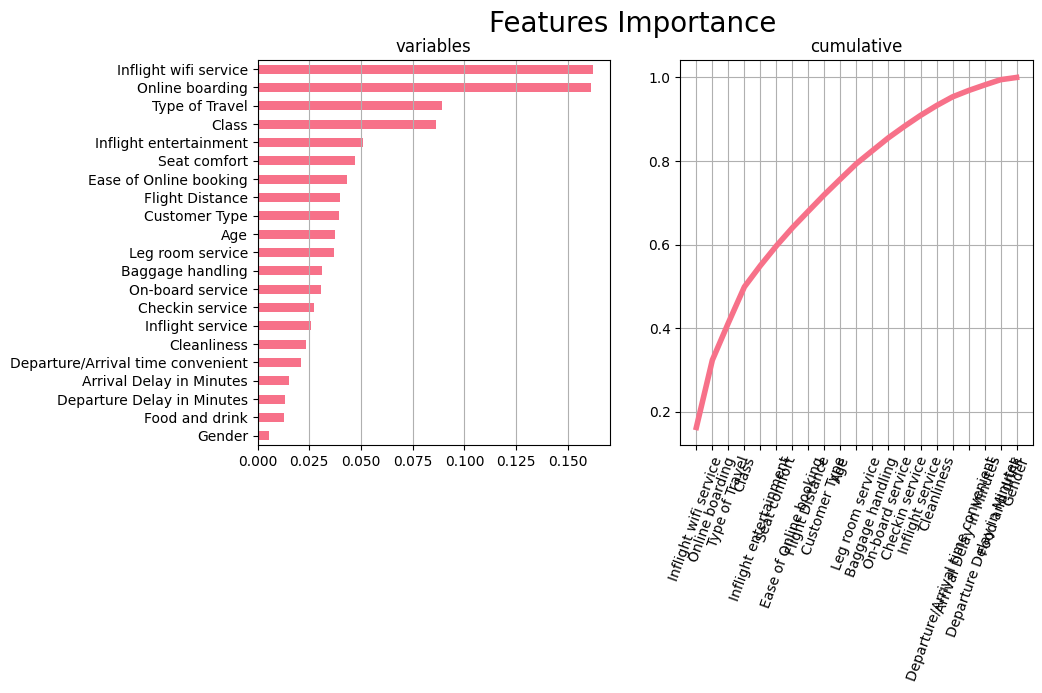

In [ ]:
feature_names = train_x_scaled.columns.tolist()
model = RandomForestClassifier(n_estimators=100,
                                        criterion="entropy", random_state=0)
model.fit(train_x_scaled, train_y_scaled_numeric)
importances = model.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(train_x_scaled, train_y_scaled.astype('int32'))
rfc_prediction = rfc.predict(test_x_scaled)
rfc_accuracy = accuracy_score(test_y_scaled_numeric, rfc_prediction)

print(f'Random forest accuracy: {rfc_accuracy}')
print(f'Random forest prediction: {rfc_prediction}')

Random forest accuracy: 0.9596802224539451
Random forest prediction: [1 1 0 ... 0 1 0]


In [ ]:
accuracy = metrics.accuracy_score(test_y_scaled_numeric, rfc_prediction)
recall = metrics.recall_score(test_y_scaled_numeric, rfc_prediction, average="weighted")
precision = metrics.precision_score(test_y_scaled_numeric, rfc_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_scaled_numeric, rfc_prediction, target_names=[str(i) for i in np.unique(test_y_scaled_numeric)]))

Recall (all 1s predicted right): 0.96
Precision (confidence when predicting a 1): 0.96
Detail:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [ ]:
dtc = DecisionTreeClassifier(criterion='log_loss', splitter='random')
dtc.fit(train_x_scaled, train_y_scaled_numeric)
dtc_prediction = dtc.predict(test_x_scaled)
dtc_accuracy = accuracy_score(test_y_scaled_numeric, rfc_prediction)

print(f'Decision tree accuracy: {dtc_accuracy}')
print(f'Decision tree prediction: {dtc_prediction}')

Decision tree accuracy: 0.9596802224539451
Decision tree prediction: [1 1 0 ... 0 1 0]


In [ ]:
accuracy = metrics.accuracy_score(test_y_scaled_numeric, dtc_prediction)
recall = metrics.recall_score(test_y_scaled_numeric, dtc_prediction, average="weighted")
precision = metrics.precision_score(test_y_scaled_numeric, dtc_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_scaled_numeric, dtc_prediction, target_names=[str(i) for i in np.unique(test_y_scaled_numeric)]))

Recall (all 1s predicted right): 0.94
Precision (confidence when predicting a 1): 0.94
Detail:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14528
           1       0.93      0.94      0.94     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893



In [ ]:
lgr = LogisticRegression(solver='liblinear')
lgr.fit(train_x_scaled, train_y_scaled_numeric)
lgr_prediction = lgr.predict(test_x_scaled)
lgr_accuracy = accuracy_score(test_y_scaled_numeric, lgr_prediction)

print(f'sk Logistic Regression accuracy: {lgr_accuracy}')
print(f'sk Logistic Regression prediction: {lgr_prediction}')

sk Logistic Regression accuracy: 0.871200710616769
sk Logistic Regression prediction: [1 1 0 ... 0 1 0]


In [ ]:
accuracy = metrics.accuracy_score(test_y_scaled_numeric, lgr_prediction)
recall = metrics.recall_score(test_y_scaled_numeric, lgr_prediction, average="weighted")
precision = metrics.precision_score(test_y_scaled_numeric, lgr_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_scaled_numeric, lgr_prediction, target_names=[str(i) for i in np.unique(test_y_scaled_numeric)]))

Recall (all 1s predicted right): 0.87
Precision (confidence when predicting a 1): 0.87
Detail:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14528
           1       0.89      0.81      0.85     11365

    accuracy                           0.87     25893
   macro avg       0.87      0.86      0.87     25893
weighted avg       0.87      0.87      0.87     25893



In [ ]:
lin_svc = svm.LinearSVC()
lin_svc.fit(train_x_scaled, train_y_scaled_numeric)
lin_svc_prediction = lin_svc.predict(test_x_scaled)
lin_svc_accuracy = accuracy_score(test_y_scaled_numeric, lin_svc_prediction)

print(f'sk LinearSVC accuracy: {lin_svc_accuracy}')
print(f'sk LinearSVC prediction: {lin_svc_prediction}')

sk LinearSVC accuracy: 0.871084849187039
sk LinearSVC prediction: [1 1 0 ... 0 1 0]


In [ ]:
svc = svm.SVC(gamma='auto')
svc.fit(train_x_scaled, train_y_scaled_numeric)
svc_prediction = svc.predict(test_x_scaled)
svc_accuracy = accuracy_score(test_y_scaled_numeric, svc_prediction)

print(f'sk Support vector classification accuracy: {svc_accuracy}')
print(f'sk Support vector classification prediction: {svc_prediction}')

sk LDA accuracy: 0.8679935324915307
sk LDA prediction: [1 1 0 ... 0 1 0]


In [ ]:
accuracy = metrics.accuracy_score(test_y_scaled_numeric, svc_prediction)
recall = metrics.recall_score(test_y_scaled_numeric, svc_prediction, average="weighted")
precision = metrics.precision_score(test_y_scaled_numeric, svc_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_scaled_numeric, svc_prediction, target_names=[str(i) for i in np.unique(test_y_scaled_numeric)]))

Recall (all 1s predicted right): 0.87
Precision (confidence when predicting a 1): 0.87
Detail:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89     14573
           1       0.89      0.80      0.84     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



In [ ]:
nbg = GaussianNB()
nbg.fit(train_x_scaled, train_y_scaled.astype('int32'))
nbg_prediction = nbg.predict(test_x_scaled)
nbg_prediction_proba = nbg.predict_proba(test_x_scaled)
nbg_accuracy = accuracy_score(test_y_scaled.astype('int32'), nbg_prediction)

print(f'sk Gaussian Naive Bayes accuracy: {nbg_accuracy}')
print(f'sk Gaussian Naive Bayes prediction: {nbg_prediction}')

sk Gaussian Naive Bayes accuracy: 0.861275248136562
sk Gaussian Naive Bayes prediction: [1 1 0 ... 0 1 0]


In [ ]:
accuracy = metrics.accuracy_score(test_y_scaled.astype('int32'), nbg_prediction)
recall = metrics.recall_score(test_y_scaled.astype('int32'), nbg_prediction, average="weighted")
precision = metrics.precision_score(test_y_scaled.astype('int32'), nbg_prediction, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(test_y_scaled.astype('int32'), nbg_prediction, target_names=[str(i) for i in np.unique(test_y_scaled.astype('int32'))]))

Recall (all 1s predicted right): 0.86
Precision (confidence when predicting a 1): 0.86
Detail:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14528
           1       0.88      0.79      0.83     11365

    accuracy                           0.86     25893
   macro avg       0.86      0.85      0.86     25893
weighted avg       0.86      0.86      0.86     25893



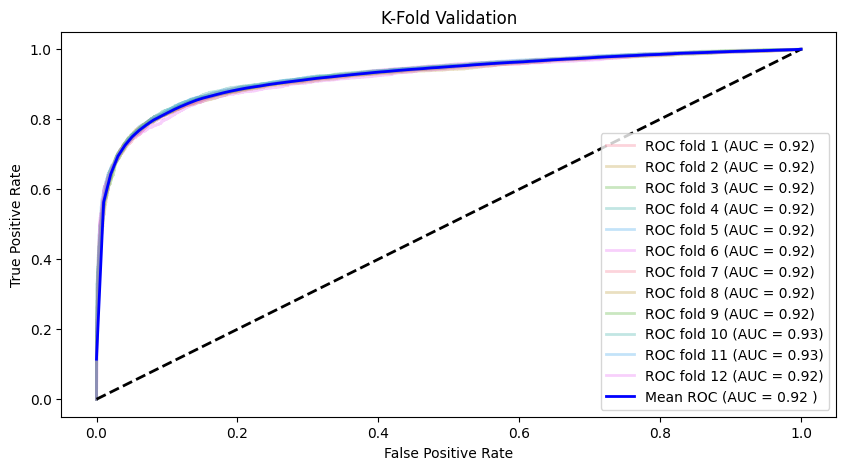

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=12, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(10, 5), dpi=100)
i = 1
for train, test in cv.split(train_x_scaled, train_y_scaled.astype('int32')):
    X_train_selected = train_x_scaled.iloc[train]

    y_train_selected = train_y_scaled.astype('int32').iloc[train]
    X_train_selected_test = train_x_scaled.iloc[test]
    y_train_selected_test = train_y_scaled.astype('int32').iloc[test]

    prediction = nbg.fit(X_train_selected, y_train_selected).predict_proba(X_train_selected_test)
    fpr, tpr, t = metrics.roc_curve(y_train_selected_test, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")

plt.show()

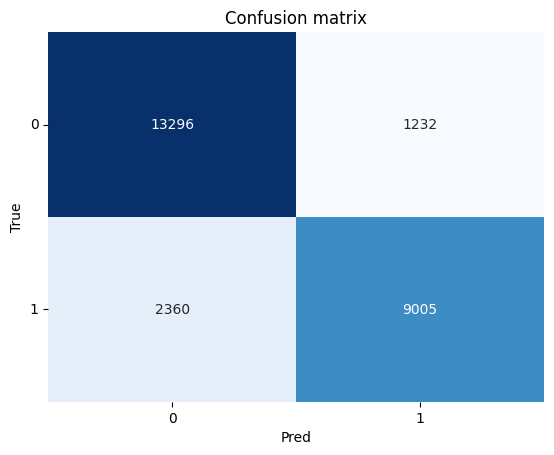

In [ ]:
classes = np.unique(train_y)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(test_y_scaled_numeric, nbg_prediction, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)

plt.show()

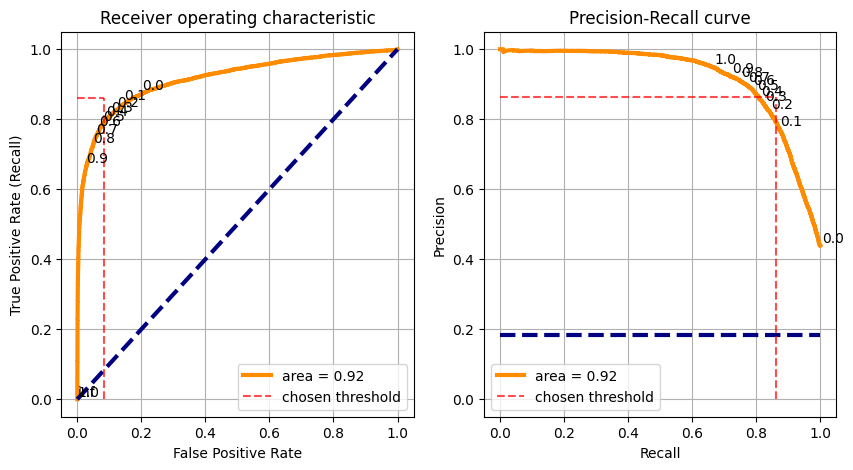

In [ ]:
classes = np.unique(test_y_scaled_numeric)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=100)

fpr, tpr, thresholds = metrics.roc_curve(test_y_scaled_numeric, nbg_prediction_proba[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].hlines(y=recall, xmin=0, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[0].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
ax[0].set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
## annotate ROC thresholds
'''
найдем пороговые значения ROC
'''

thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
## plot P-R curve
'''
плстроим привую P-R
'''

precisions, recalls, thresholds = metrics.precision_recall_curve(test_y_scaled_numeric, nbg_prediction_proba[:,1], pos_label=1)
roc_auc = metrics.auc(recalls, precisions)
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % roc_auc)
ax[1].plot([0,1], [(cm[1,0]+cm[1,0])/len(test_y_scaled_numeric), (cm[1,0]+cm[1,0])/len(test_y_scaled_numeric)], linestyle='--', color='navy', lw=3)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="lower left")
ax[1].grid(True)
## annotate P-R thresholds
'''
пороговые значения P-R
'''
thres_in_plot = []
for i,t in enumerate(thresholds):
    t = np.round(t,1)
    if t not in thres_in_plot:
        ax[1].annotate(np.round(t,1), xy=(recalls[i],precisions[i]),
                    xytext=(recalls[i],precisions[i]),
                    textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)
    else:
        next
plt.show()

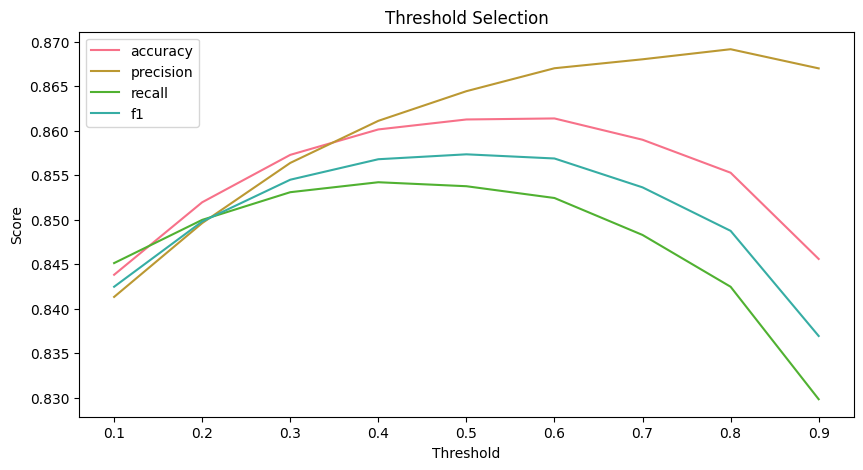

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5),dpi=100)

dic_scores = {'accuracy':[], 'precision':[], 'recall':[], 'f1':[]}
#XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(train_x_scaled, train_y_scaled.astype('int32'), test_size=0.3)
#predicted_prob = nbg.fit(train_x_scaled, train_y_scaled.astype('int32')).predict_proba(test_x_scaled)[:,1]
thresholds = []
for threshold in np.arange(0.1, 1, step=0.1):
    predicted = (nbg_prediction_proba[:,1] > threshold)
    thresholds.append(threshold)
    dic_scores["accuracy"].append(metrics.accuracy_score(test_y_scaled.astype('int32'), predicted))
    dic_scores["precision"].append(metrics.precision_score(test_y_scaled.astype('int32'), predicted, average='macro'))
    dic_scores["recall"].append(metrics.recall_score(test_y_scaled.astype('int32'), predicted, average='macro'))
    dic_scores["f1"].append(metrics.f1_score(test_y_scaled.astype('int32'), predicted, average='macro'))

dtf_scores = pd.DataFrame(dic_scores).set_index(pd.Index(thresholds))
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)

plt.show()